# Lab - Sistemas

*Processamento Digital de Sinais - UFPR - Prof. Eduardo Parente Ribeiro*

Nesta tarefa voce deve implementar sistemas discretos.
Para tanto crie uma função que implemente uma equação que forneça uma saída y (*array*) a partir do sinal discreto de entrada x (*array*).

Criar uma função para cada sistema. 

Teste o sistema com a sequência $x = \{0, 0, 0, 1, 2, 5, 3, 0, 0\}$, onde o primeiro valor corresponde a $n=0$. O *array* de saída pode ter tamanho diferente do *array* de entrada. Plotar tanto a entrada $x[n]$ quanto a saída $y[n]$ no mesmo eixo. Para não "esconder" o valor de $x[n]$, deslocar o valor de abcissa em 0.1 .


In [56]:
from pylab import *

Exemplo de sistema que atrasa N unidades:<br>
$y[n]= T\{x[n]\}=x[n-N]$

In [57]:
def sistema_Ex(x):
   y=concatenate((zeros(2),x))
   return y


para verificar o resultado use:

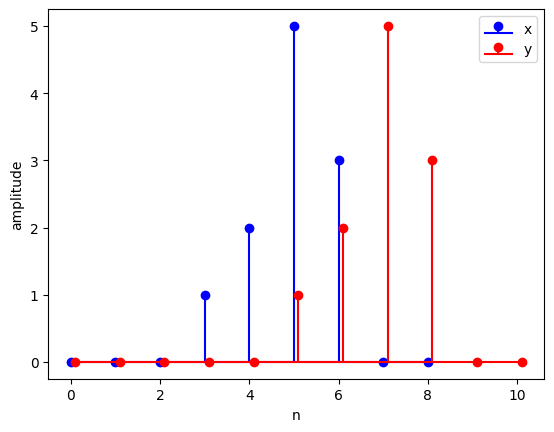

In [58]:
n=arange(9)
x=array([0, 0, 0, 1, 2, 5, 3, 0, 0]);
# realiza deslocamento de N=2 unidades
y=sistema_Ex(x)
ny=arange(len(y))
stem(n,x,linefmt='b-',markerfmt='bo',basefmt='b',label='x')
# plota a saida deslocada de 0.1 para "enxergar" o valor
stem(ny+0.1,y,linefmt='r-',markerfmt='ro',basefmt='r',label='y')
xlabel('n')
ylabel('amplitude')
legend()
show()


1) Implemente e teste os seguintes sistemas:

a) atrasa a entrada em três unidades<br>
$y[n]= T\{x[n]\} = x[n-3]$

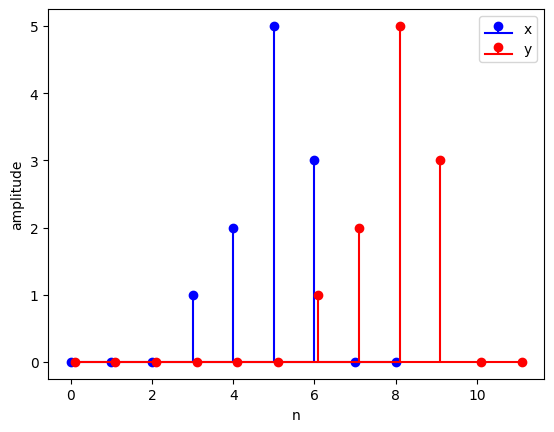

In [65]:
def sistema_atraso(x, N):
    y = concatenate((zeros(N), x))
    return y

n = arange(9)
x = array([0, 0, 0, 1, 2, 5, 3, 0, 0])
N = 3
y = sistema_atraso(x, N)
ny = arange(len(y))

stem(n, x, linefmt='b-', markerfmt='bo', basefmt='b', label='x')
stem(ny + 0.1, y, linefmt='r-', markerfmt='ro', basefmt='r', label='y')
xlabel('n')
ylabel('amplitude')
legend()
show()


b) a saída corresponde ao valor quadrado da entrada.<br>
$y[n]= T\{x[n]\} = x[n]^2$

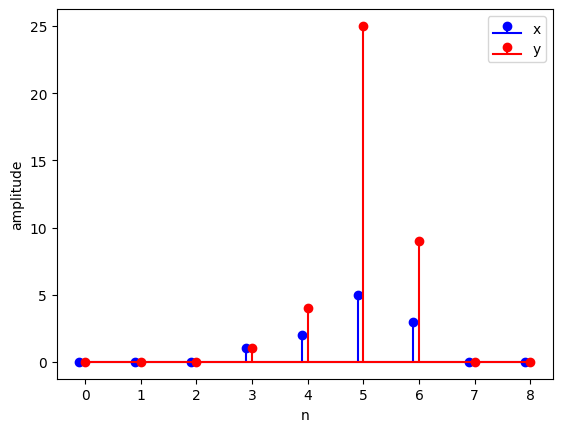

In [60]:
from pylab import *

def sistema_quadratico(x):
    y = x ** 2
    return y

n = arange(9)
x = array([0, 0, 0, 1, 2, 5, 3, 0, 0])
y = sistema_quadratico(x)

stem(n - 0.1 , x, linefmt='b-', markerfmt='bo', basefmt='b', label='x')
stem(n , y, linefmt='r-', markerfmt='ro', basefmt='r', label='y')
xlabel('n')
ylabel('amplitude')
legend()
show()


c) a saída corresponde ao dobro da entrada somada ao valor 4.<br>
$y[n]= T\{x[n]\} = 2x[n]+1$

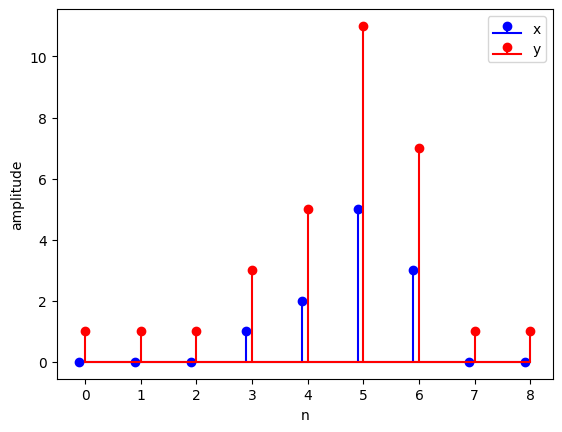

In [61]:
def sistema_dobro_mais_um(x):
    y = 2 * x + 1
    return y

n = arange(9)
x = array([0, 0, 0, 1, 2, 5, 3, 0, 0])
y = sistema_dobro_mais_um(x)

stem(n - 0.1, x, linefmt='b-', markerfmt='bo', basefmt='b', label='x')
stem(n, y, linefmt='r-', markerfmt='ro', basefmt='r', label='y')
xlabel('n')
ylabel('amplitude')
legend()
show()



d) a saída corresponde a uma combinação linear da entrada multiplicada por 2 mais a entrada deslocada de 1 unidade multiplicada por 3.<br>
$y[n]= T\{x[n]\} = 2x[n] + 3x[n-1]$

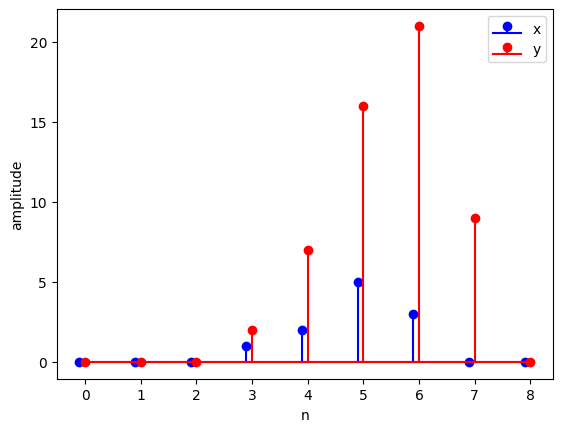

In [62]:
def sistema_combinacao_linear(x):
    y = 2 * x + 3 * concatenate(([0], x[:-1]))
    return y

n = arange(9)
x = array([0, 0, 0, 1, 2, 5, 3, 0, 0])
y = sistema_combinacao_linear(x)

stem(n - 0.1, x, linefmt='b-', markerfmt='bo', basefmt='b', label='x')
stem(n, y, linefmt='r-', markerfmt='ro', basefmt='r', label='y')
xlabel('n')
ylabel('amplitude')
legend()
show()


e) Média-móvel: Cada valor da saída seja a média aritmética do valor de entrada e suas 2 posições anteriores.<br>
$y[n]= T\{x[n]\} = \frac{1}{3}\sum_{k=n-2}^{n}{x[k]}$

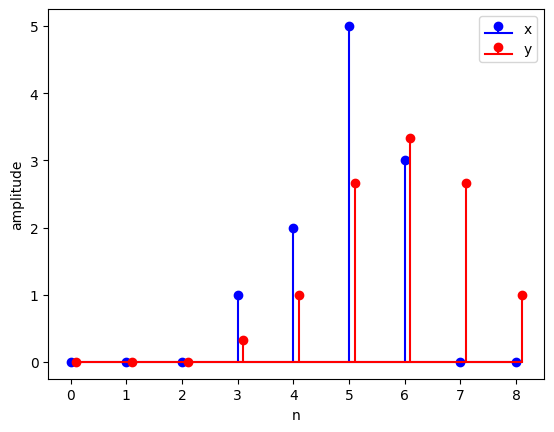

In [63]:
def sistema_media_movel(x):
    y = []
    for n in range(len(x)):
        if n < 2:
            y.append(0)  # Consideramos 0 para os primeiros dois valores de saída
        else:
            average = (x[n] + x[n - 1] + x[n - 2]) / 3
            y.append(average)
    return array(y)

# Sequência de entrada
n = arange(9)
x = array([0, 0, 0, 1, 2, 5, 3, 0, 0])

# Calcula a saída da média móvel usando o sistema
y = sistema_media_movel(x)

ny = arange(len(y))

stem(n, x, linefmt='b-', markerfmt='bo', basefmt='b', label='x')
# Plota a saída deslocada de 0.1 para não esconder o valor de x[n]
stem(ny + 0.1, y, linefmt='r-', markerfmt='ro', basefmt='r', label='y')
xlabel('n')
ylabel('amplitude')
legend()
show()


f) Acumulador. A saída corresponde a acumulação (soma) dos valores da entrada até o presente momento.<br>
$y[n]= T\{x[n]\} = \sum_{k=-\infty}^{n}{x[k]}$

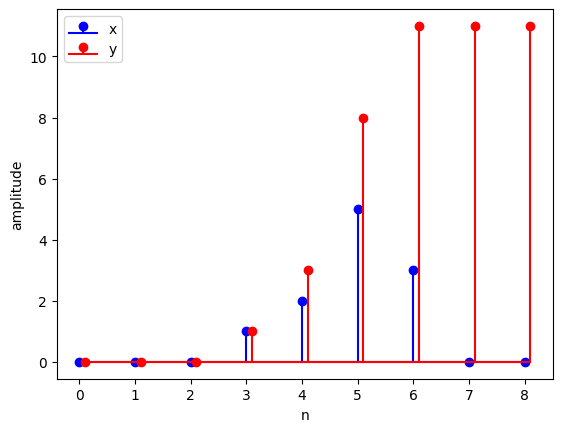

In [64]:
def sistema_acumulador(x):
    y = cumsum(x)
    return y

n = arange(9)
x = array([0, 0, 0, 1, 2, 5, 3, 0, 0])
y = sistema_acumulador(x)

stem(n, x, linefmt='b-', markerfmt='bo', basefmt='b', label='x')
stem(n + 0.1, y, linefmt='r-', markerfmt='ro', basefmt='r', label='y')
xlabel('n')
ylabel('amplitude')
legend()
show()


2) Classifique os sistemas anteriores dizendo se são:\
I) linear ou não linear\
II) com memória ou sem memória\
III) invariante ao deslocamento ou variante ao deslocamento\
IV) causal ou não causal\
V) estável ou não estável

a) a) atrasa a entrada em três unidades<br>
$y[n]= T\{x[n]\} = x[n-3]$<br>

I) Linear: Não é linear, pois envolve um deslocamento variável. II) Memória: Possui memória, pois depende de valores passados da entrada. III) Invariância: É invariante ao deslocamento. IV) Causal: É causal. V) Estabilidade: É estável.

b) a saída corresponde ao valor quadrático da entrada.<br>
$y[n]= T\{x[n]\} = x[n]^2$<br>

I) Linear: Não é linear, pois envolve uma operação não linear (elevar ao quadrado). II) Memória: Não possui memória, pois a saída depende apenas do valor presente da entrada. III) Invariância: É invariante ao deslocamento. IV) Causal: É causal. V) Estabilidade: É estável.


c) a saída corresponde ao dobro da entrada somada ao valor 1.<br>
$y[n]= T\{x[n]\} = 2x[n]+1$<br>

I) Linear: É linear. II) Memória: Não possui memória, pois a saída depende apenas do valor presente da entrada. III) Invariância: É invariante ao deslocamento. IV) Causal: É causal. V) Estabilidade: É estável.


d) a saída corresponde a uma combinação linear da entrada multiplicada por 2 mais a entrada deslocada de 1 unidade multiplicada por 3.<br>
$y[n]= T\{x[n]\} = 2x[n]+3x[n-1]$<br>

I) Linear: É linear. II) Memória: Possui memória, pois depende de valores passados da entrada. III) Invariância: Não é invariante ao deslocamento, pois envolve uma multiplicação pela entrada deslocada. IV) Causal: É causal. V) Estabilidade: É estável.

e) Média-móvel: Cada valor da saída seja a média aritmética do valor de entrada e suas 2 posições anteriores.<br>
$y[n]= T\{x[n]\} = \frac{1}{3}\sum_{k=n-2}^{n}{x[k]}$<br>

I) Linear: É linear. II) Memória: Possui memória, pois depende de valores passados da entrada. III) Invariância: Não é invariante ao deslocamento, pois envolve uma média ao longo do tempo. IV) Causal: É causal. V) Estabilidade: É estável.

f) Acumulador. A saída corresponde a acumulação (soma) dos valores da entrada até o presente momento.<br>
$y[n]= T\{x[n]\} = \sum_{k=-\infty}^{n}{x[k]}$<br>

I) Linear: É linear. II) Memória: Possui memória, pois depende da soma acumulada dos valores passados da entrada. III) Invariância: Não é invariante ao deslocamento, pois a saída depende da soma acumulada. IV) Causal: É causal. V) Estabilidade: É estável.
